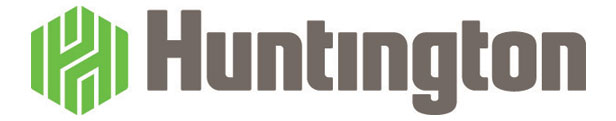
# Automation Book Club

## Automate the Boring Stuff with Python
## Chapters 7 & 8
## Presented by Josh Clark
## 3/20/19

# Introductions
## What is your name?
## What department do you work with at Huntington?

# Continuous Improvement
## “We always look for ways to improve: Welcoming and accepting of new ideas, approaches and perpetual changes; Developing better understanding of customer’s expectations; Consistently collaborating to innovate and improve products, services, and processes; Looking for ways to make it easier to do business with us; Getting incrementally better every day.”  - Huntington Core Value

# Chapter 8: Reading and Writing Files

## Interacting with the OS

### Basics of the OS Module

In [ ]:
# To begin using the module
import os

In [ ]:
# Using the OS's native path separator (backslash vs forward slash)
print(os.path.join('myFiles', 'subFolder', 'keepGoing'))

In [ ]:
# In a real world example:
list_of_files = ['fileOne', 'fileTwo', 'fileThree']
for file in list_of_files:
    print(os.path.join('C:\\system32\\importantFolder', file))

In [ ]:
# What if I know the files are in the same folder as my script?
print(os.getcwd())

In [ ]:
# What if I know all the files are in a different folder?
os.chdir('U:\\Requests')
print(os.getcwd())

In [ ]:
# And what if the folder doesn't exist?
os.chdir('U:\\PizzaPartyForBookClub')

In [ ]:
# The OS module can work with relative paths
print(os.getcwd())
os.chdir('..')
print(os.getcwd())

In [ ]:
# The os.path module can help you with relative paths
print(os.path.abspath('.\\Requests'))
print(os.path.isabs('.'))

In [ ]:
# It can also tell you the relative path from one location to another
print(os.path.relpath('U:\\Documents\\EdgeRouter', 'U:\\PythonUsersGroup\\DevOpsBookClub\\AutomateTheBoringStuff\\Ch7_8'))

In [ ]:
# Let's pretend a user gave us a relative path name and we need the folder structure
user_input = '.\\Requests'
print(os.path.abspath(user_input))
print(os.path.dirname(os.path.abspath(user_input)))
# And the name of the directory
print(os.path.basename(os.path.abspath(user_input)))

### File Sizes and Folder Contents

In [ ]:
# Real life example!
# I had to interpret text files pulled daily from an API
filepath = 'U:\\Documents\\EdgeRouter'
for entry in os.listdir(filepath):
    if entry.startswith('interface_data_'):
        example_file = os.path.join(filepath, entry) # I know this gets overwritten each iteration. Saving it for later...
        print(example_file)

In [ ]:
# I didn't have to do this, but let's also pull the file sizes
for entry in os.listdir(filepath):
    if entry.startswith('interface_data_'):
        print(entry + ' | ' + str(os.path.getsize(os.path.join(filepath, entry))))

In [ ]:
# To verify that the path given is correct:
print(os.path.exists('U:\\PizzaPartyForBookClub'))

# To verify the path given has a file attached to it
print(os.path.isfile(filepath))
print(os.path.isdir(filepath))

## Reading and Writing Files

### There are 3 steps:
#### 1. Call the open() function to return a File object
#### 2. Call the read() or write() method on the File object
#### 3. Close the file by calling the close() method on the File object

### Reading from a file

In [ ]:
# Call the open() function
file_obj = open(example_file, 'r', encoding='utf-16') # default is read-only. Add a 'w' as a second argument to write
print(type(file_obj))

In [ ]:
# Read some stuff out of it
file_content = file_obj.read()
print(file_content[:100])

In [ ]:
# Let's format this a little better by reading each line as an entry in a list
file_obj.seek(0) # Reset the pointer to the beginning
file_content_neat = file_obj.readlines()
print(file_content_neat[1])
print(file_content_neat[10])
print(file_content_neat[:10])

In [ ]:
# Close the file when we're done with it
file_obj.close()

### Writing to a file

In [ ]:
os.chdir(r'U:\PythonUsersGroup\DevOpsBookClub\AutomateTheBoringStuff\Ch7_8')
new_file = open('new_file.txt', 'w')
new_file.write('This is a brand new file that\'s definitely never existed before!')
new_file.close()

In [ ]:
some_random_file = open('new_file.txt', 'r')
print(some_random_file.read())
some_random_file.close()

## Saving Variables

### The shelve module

In [ ]:
import shelve

shelf_file_name = 'automation_notebook_vars'

shelfFile=shelve.open(shelf_file_name)
important_string = "I legit had no idea this existed before reading this chapter."
shelfFile['important_string'] = important_string
shelfFile.close()

In [ ]:
# What does it look like?
for item in os.listdir(os.getcwd()):
    if item.startswith(shelf_file_name):
        print(item)

In [ ]:
# Let's use my important string again
shelfFile = shelve.open(shelf_file_name)
print(type(shelfFile))
print(list(shelfFile.keys()))
print(list(shelfFile.values()))
restored_important_string = shelfFile[list(shelfFile.keys())[0]]
print(restored_important_string)

In [ ]:
shelfFile.close()

# Chapter 7: Regular Expressions

Regular expressions are metacharacters. Basically, it's text used to describe text. If we know "the shape" of the text, we can describe it and find it without knowing exactly what it says.

In [ ]:
import re

## Basic Pattern Matching

In [ ]:
# Let's match a phone number
# The '\d' metacharacter is used to describe a single digit
phoneNumberRegex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')

hsd_match_object = phoneNumberRegex.search('You can reach the Huntington Service Desk at 614-480-5555')
print(hsd_match_object.group())

## Python Regex Cheat Sheet

These are my most frequently used metacharacters. There are many more out there.

#### Basic metacharacters

`.`  | The dot matches any character except for a newline \n

`\d` | Matches any decimal digit [0-9]

`\D` | Matches any non decimal digit 

`\s` | Matches any whitespace (including spaces, tabs, newlines)

`\S` | Matches any non-whitespace character

`\w` | Matches any word character [a-zA-Z0-9_]

`\W` | Matches any non-word character

`[]` | Matches anything inside the brackets

#### Modifiers

`*`     | Matches zero or more repetitions of the preceding expression 

`+`     | Matches one or more repetitions of the preceding expression

`?`    | Matches zero or one repetitions of the preceding expression. If it comes after a `*` or `+`, then it makes those non-greedy

`\` | Escapes other characters. If you need to actually search for `r'\S'`, the regex would be `r'\\S'`

`{x}`   | Matches x number of repetitions of the preceding expression

`{x,y}` | Matches between x and y number of repetitions of the preceding expression

In [ ]:
# A few examples
text = '''Product name:      endace
Product release:   OSm6.4.0_35 4a85279
Build ID:          Release
Build date:        2018-06-13 18:37:51
Target arch:       x86_64
Built by:          
Version summary:   endace OSm6.4.0_35 4a85279 Release 2018-06-13 18:37:51 x86_64

Uptime:            14d 2h 17m 45.728s
CPU load averages: 0.84 / 0.78 / 0.63
Number of CPUs:    16
System memory:     16174 MB used / 48279 MB free / 64453 MB total
Swap:              0 MB used / 0 MB free / 0 MB total
'''

ipmi_raw_output = '''DHCP:               Enabled
IP Address:         10.0.13.28
MAC Address:        ac:1f:6b:11:40:eb
'''

# I'm going to call the search a slightly different way
# Let's say I want the OS version:
os_version = re.search(r'Product release:\s+(\S+)', text)
print(os_version)
print(os_version.group())
print(os_version.group(1))

# Now let's extract the IP address from the IPMI output
ipmi_ip = re.search(r'IP Address:\s*?(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})', ipmi_raw_output)
print(ipmi_ip.group())
print(ipmi_ip.group(1))

## Grouping

Grouping lets you match multiple strings in a single operation.

Enclose each group in its own set of parentheses

In [ ]:
# What if I want both the IPMI IP address and MAC address?
ipmi_info = re.search(r'IP Address:\s*([\d\.]{7,15})[\s\S]*?MAC Address:\s*([\da-fA-F:\.]{17})',ipmi_raw_output)
print(ipmi_info.group() + "\n")
print(ipmi_info.group(1) + "\n")
print(ipmi_info.group(2))

# Extras

## TextFSM

TextFSM is a module developed by Google that allows you to template your regex. Here's an example of a template for the IPMI output we looked at before:

```
Value Required DHCP (\S+)
Value IPAddr (\d{1,3}.\d{1,3}.\d{1,3}.\d{1,3})
Value MACAddr ([0-9a-fA-F]+:[0-9a-fA-F]+:[0-9a-fA-F]+:[0-9a-fA-F]+:[0-9a-fA-F]+:[0-9a-fA-F]+)

Start
  ^\s*DHCP:\s+${DHCP}
  ^\s*IP Address:\s+${IPAddr}
  ^\s*MAC Address:\s+${MACAddr}
```

In [ ]:
import textfsm

template_filename = r'U:\Tools\EndaceAutomation\outputTemplates\ipmiTemplate.txt'

with open(template_filename, 'r') as template:
    re_table = textfsm.TextFSM(template)
output = re_table.ParseText(ipmi_raw_output)
print(output)

Let's look at the API download file from earlier:
```
Value Filldown Device (\d+)
Value Filldown Interface (\d+)
Value Filldown Direction (\w+)
Value Required Timestamp (\d+)
Value Bytes (\d+)

Start
  ^Device: ${Device}
  ^Interface: ${Interface}
  ^Octets ${Direction}
  ^${Timestamp} : ${Bytes} -> Next.Record
  ^\n -> Clearall Start
```

In [ ]:
api_template_fn = r'U:\Documents\EdgeRouter\timestamps_template.txt'

print(example_file)

In [ ]:
with open(example_file, encoding='utf-16') as raw_api_file:
    raw_api_data = raw_api_file.read()

with open(api_template_fn) as api_template:
    re_table = textfsm.TextFSM(api_template)
    
api_info = re_table.ParseText(raw_api_data)
print(api_info[:10])
print("\n")
for item in api_info:
    print(item)

# Sources

https://automatetheboringstuff.com/

https://github.com/google/textfsm/wiki/TextFSM

https://regex101.com/

https://www.dataquest.io/blog/regex-cheatsheet

# Thanks Everyone!